# Some CSD Issues

## Last updated by Qiang Zhu on 2021/09/16

In [1]:
# creates driver that handles crystal structure database entries
from ccdc import io
csd_reader=io.EntryReader('CSD') 
print("Total number of Entries", len(csd_reader))

Total number of Entries 1135968


In [2]:
# Check if the entry is truly organic from formula
# A lot of entries are assigned to be organic but they have metals

def good_formula(formula):
    for ele in ['Li', 'Na', 'K', 'Mg', 'Ca', 'Rb', 'Cs', 'Ba', 'Be', 'Sr', 'Fe', 'Pt']:
        if formula.find(ele)>-1:
            return False
    if formula.find(')n') > -1: #polymers
        return False
    else:
        return True

for i in range(500):
    entry = csd_reader[i]
    mol = entry.molecule
    ccdc = entry.ccdc_number
    formula = entry.formula
    if ccdc is not None and mol.is_organic:
        if not good_formula(formula):
            print(i, ccdc, entry.identifier, formula)

/Users/qiangzhu/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


98 244156 ABAGEQ C42 H82 Ca2 N2 O4 Si4
101 244157 ABAGIU C44 H52 K4 O4,4(C7 H8)
104 244158 ABAGOA C22 H62 Ca1 K1 N3 O1 Si6
106 244159 ABAGUG C74 H94 Ca2 K2 O8
110 244160 ABAHAN C60 H84 Ca1 K2 O8
178 216488 ABAMEW C108 H132 Li4 N4 P4,3(C5 H12)
200 793605 ABANID C64 H88 Mg2 N4


In [3]:
# Entries with missing smiles

for i in range(2000):
    entry = csd_reader[i]
    mol = entry.molecule
    ccdc = entry.ccdc_number
    formula = entry.formula
    if ccdc is not None and mol.is_organic and good_formula(formula):
        if mol.smiles is None:
            print(i, ccdc, entry.identifier, formula)

/Users/qiangzhu/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1068 1453932 ABIMOQ C102 H102 N12,5.5(C3 H8 O1),5.5(C1 H2 Cl2)
1395 248685 ABOGII C47 H26 F6 S2
1453 1518890 ABOKIO C52 H63 N5 O4
1486 147335 ABOMEJ C65 H47 N23 O10,0.5(C1 H4 O1),1.5(H2 O1)
1490 142810 ABOMIN C51 H47 N15 O10,2(C2 H6 O1 S1),1.5(C2 H3 N1),2(H2 O1)
1658 162875 ABOVIW C48 H46 N4 O4,C1 H4 O1
1791 1100268 ABTNBA C12 H10 N2,2(C6 H3 N3 O6)
1793 1100269 ABTNBB C13 H11 N1,2(C6 H3 N3 O6)


In [4]:
# Entries which are not single components 
# But they are labeled to be have only one component

for i in range(500):
    entry = csd_reader[i]
    mol = entry.molecule
    ccdc = entry.ccdc_number
    formula = entry.formula
    if ccdc is not None and mol.is_organic and good_formula(formula) and len(mol.components)==1:
        if formula.find(',') > -1:
            print(i, ccdc, entry.identifier, formula)

/Users/qiangzhu/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


306 1058920 ABAWAE C29 H18 N4 O2,0.5(C1 H2 Cl2)
377 1100064 ABAZOS01 C14 H29 Br1,C1 H4 N2 O1


In [5]:
# Some temporary fixes
fixes = [
    ([9301], "Cc1cc(C)cc(c1)N1C(=O)c2ccc3c4ccc5C(=O)N(c6cc(C)cc(C)c6)C(=O)c6ccc(c7ccc(C1=O)c2c37)c4c56"),
    ([12865], "C1=C[N+](=O)C=CN1[O-]"),
    ([15701, 15702], "CC1(C([N+](=C(N1[O])C2=CC=NC=C2)[O-])(C)C)C"),
    ([23360], "C1CC2(N(C1=O)C(CO2)C3=CC=CC=C3)C4=CC(=CC=C4)C56CCC(=O)N5C(CO6)C7=CC=CC=C7"),
    ([24295, 24296], "C1=C(C=C(C2=C1C3=C4C=C(C=C(C4=C5C6=C3C7=C2C8=C(C9=C7C1=C6C(=C2C(=CC(=CC2=C1C1=C9C(=CC(=C1)F)F)F)F)C1=C5C(=C(C(=C1F)F)F)F)C(=C(C(=C8F)F)F)F)F)F)F)F"),
    ([56700], "C1(=NC2=NC(=N[N+]#N)N=C3N2C(=NC(=N3)N=[N+]=[N-])[N-]1)N=[N+]=[N-]"),
    ([68136], "Cc8ccc(/C=N/c7ccc(C(c2ccc(/N=C/c1ccc(C)cc1)cc2)(c4ccc(/N=C/c3ccc(C)cc3)cc4)c6ccc(/N=C/c5ccc(C)cc5)cc6)cc7)cc8"),
    ([157516, 157517], "[S-]C1=NN([N+](=N1)c1ccccc1)c1ccccc1"),
    ([182279, 182280], "c6ccc(c3cc4CC(c1ccccc1)Cc5cc(c2ccccc2)cc(c3)c45)cc6"),
    ([183136], "CC1=C([N+](=O)C2=CC=CC=C2N1[O-])C(C)C"), 
    ([192316], "O=P(O)(O)CCP(=O)(O)O"),
    ([205931], "COC1=CC=C(C=C1)C(=[N+]=[N-])C2=CC=C(C=C2)OC"),
    ([215685], "CCCCCCCCCCC1=CC=C(C=C1)[N+]#[C-]"),
    ([275059], "CC(C)(C)N([N+](=O)C(C)(C)C)[O-]"),
    ([282364], "CC(C)C1=C(C(=CC=C1)C(C)C)N2C=CN([CH]2)P(C(C)(C)C)C(C)(C)C"),
    ([283837], "CC2=[n+]1c(=O)[n-]c(=O)n1C(C)C2C"),
    ([310072, 310073], "CC1=C(C)N(C(C)C)CN1C(C)C"),
    ([377577, 377578], "C1=CC=NC(=C1)C2=CC(=CC(=N2)C3=CC=CC=N3)C4=CC=[N+](C=C4)[O-]"),
    ([391496], "CC1(C([N+](=C(N1[O])C2=CN(N=C2)C3=NC(=CC=C3)N4C=C(C=N4)C5=[N+](C(C(N5[O])(C)C)(C)C)[O-])[O-])(C)C)C"),
    ([415180], "CC(C)(C)OC(=O)C(=[N+]=[N-])C1=CC=C(C=C1)OC"),
    ([470645], "O=C([O-])c4ccc([n+]3ccc(c2cc[n+](c1ccc(C(=O)[O-])cc1)cc2)cc3)cc4"),
    ([565101], "C1=CC(=C2C=CC=C[N+]2=O)N(C=C1)[O-]"),
    ([570282], "C1CSC2=C(S1)SC(=C3SC4=C(S3)C=C(C(=C4)O)O)S2"),
    ([588754], "C1CCC2=C(C1)C=C(N(C2=C3C4=C(CCCC4)C=C([N+]3=O)C5CCCO5)[O-])C6CCCO6"),
    ([662083], "O=[N+]([O-])C1=NN=C([N+](=O)[O-])C1C2C=NN=C2"),
    ([763173], "C1=CN(C(=C2C(=CC=C[N+]2=O)C(=O)O)C(=C1)C(=O)O)[O-]"),
    ([780464], "CC1=C(O)CCC1=O"),
    ([853265], "CC1=CC(=C2C=C(C=C[N+]2=O)C)N(C=C1)[O-]"),
    ([877472], "C1=C[N+](=CC=C1CCCC2=CC=[N+](C=C2)[O-])[O-]"),
    ([889067], "CN(C=C[N+](=O)C)[O-]"),
    ([893954], "COC1=C2C=C(C=C1)C#CC3=CC(=C(C=C3)OC)C4=C(C=CC(=C4)C#CC5=CC2=C(C=C5)OC)OC"),
    ([945400], "C1=C(C=C([N+](=C1[N+](=O)[O-])[O-])[N+](=O)[O-])[N+](=O)[O-]"),
    ([1003000, 1003001], "CC1(C([N+](=C(N1[O])C#N)[O-])(C)C)C"),
    ([994352], "CN(C)C1=CC=[N+](C=C1)S(=O)[O-]"),
    ([1042351, 1042352], "C1=CC=C(C=C1)C2=NC3=C(C=C(C=C3)C4=CC5=C(C=C4)N=C(C(=N5)C6=CC=CC=C6)C7=CC=CC=C7)N=C2C8=CC=CC=C8"),
]

/Users/qiangzhu/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/qiangzhu/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CSD: Cc1cc(C)cc(c1)N1C(=O)c2ccc3c4ccc5C(=O)N(c6cc(C)cc(C)c6)C(#O)c6ccc(c7ccc(C1=O)c2c37)c4c56
NEW: Cc1cc(C)cc(c1)N1C(=O)c2ccc3c4ccc5C(=O)N(c6cc(C)cc(C)c6)C(=O)c6ccc(c7ccc(C1=O)c2c37)c4c56


RDKit ERROR: [07:28:54] Explicit valence for atom # 30 C, 5, is greater than permitted


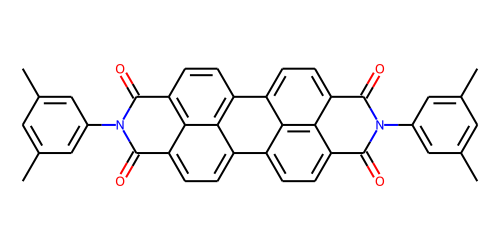

In [6]:
# Rdkit cannot parse the smiles string due to incorrect charge assignment

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.molSize = 500,250

for fix in fixes[:1]:
    for id in fix[0]:
        entry = csd_reader[id]
        mol = entry.molecule
        if mol.smiles is not None:
            sm1 = mol.smiles
            sm2 = fix[1]
            print("CSD:", sm1)
            print("NEW:", sm2)
            m1 = Chem.MolFromSmiles(sm1)
            m2 = Chem.MolFromSmiles(sm2)
            break
m1
m2